In [6]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()
df = df.dropna()
df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 30% of inaccuracies in avg_glucose_level values

ADDING 30% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 2853 rows in column 'avg_glucose_level'
Rows to modify: [1318, 1826, 2267, 1582, 3642, 5004, 7784, 7913, 6102, 9293, 7795, 5083, 702, 4499, 5982, 6817, 315, 292, 5330, 6995, 610, 4267, 2010, 6396, 631, 1877, 3739, 225, 420, 9439, 6436, 2875, 5729, 9361, 6889, 7236, 6511, 2731, 6174, 5351, 1136, 3195, 6627, 1423, 7826, 3196, 6756, 6235, 5840, 7679, 3103, 1442, 6133, 4239, 3242, 8982, 3623, 7505, 4675, 8432, 390, 6196, 830, 1105, 2314, 5366, 1270, 6644, 4201, 589, 6028, 5027, 2502, 9346, 2100, 5283, 7976, 1648, 1341, 3459, 2516, 4196, 7613, 6162, 300, 6501, 3951, 182, 5894, 4076, 5620, 7974, 4458, 9075, 2365, 1205, 2998, 3059, 7383, 4431, 2962, 5097, 2480, 1851, 526, 1309, 7719, 7683, 1809, 4375, 2542, 3865, 126, 5393, 5014, 5908, 5621, 7959, 9216, 471, 8081, 5738, 7667, 1761, 6641, 995, 6269, 6961, 4706, 4159, 1664, 3792, 5048, 5449, 8216, 3295, 6776, 2247, 2656, 7977, 1924, 2179, 5655, 593, 166, 1

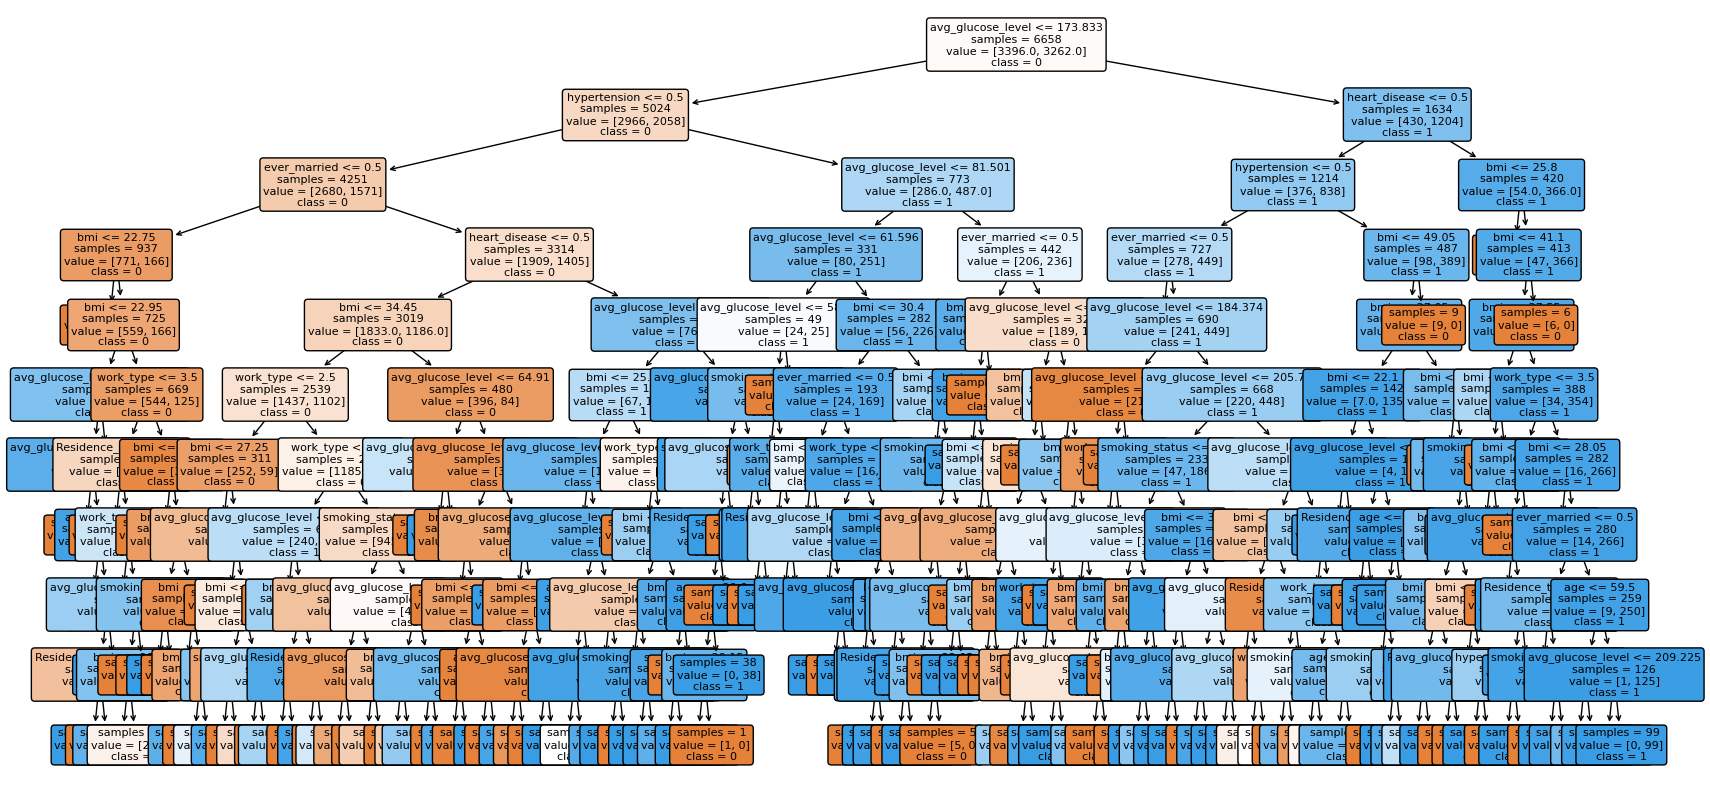

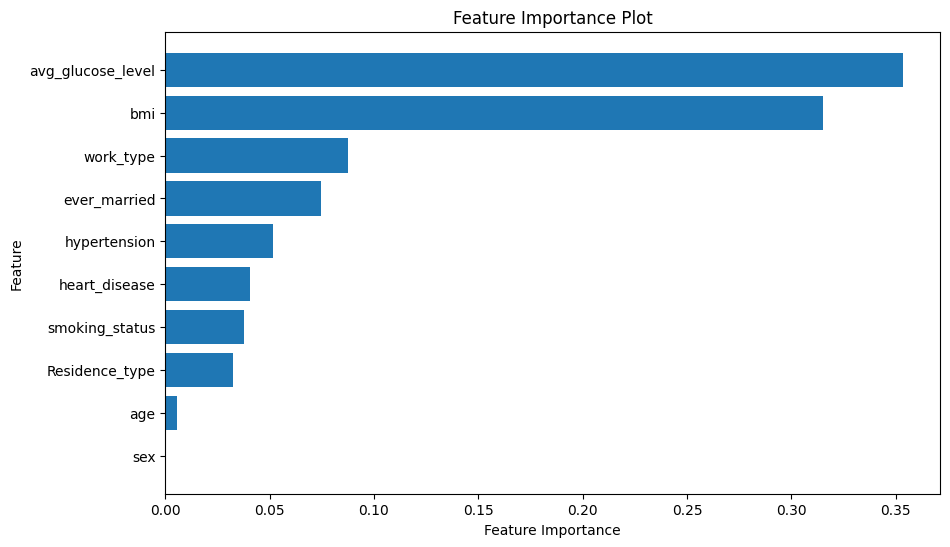

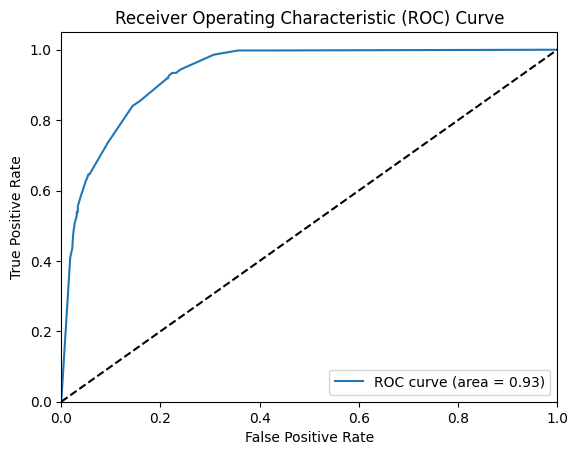

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9326706556005918
Accuracy for each fold: [0.8146853146853147, 0.7972027972027972, 0.8356643356643356, 0.8461538461538461, 0.8175438596491228, 0.7964912280701755, 0.7649122807017544, 0.7929824561403509, 0.8385964912280702, 0.7824561403508772]
Mean accuracy: 0.8086688749846644
95% confidence interval: (0.7897842959472862, 0.8275534540220427)


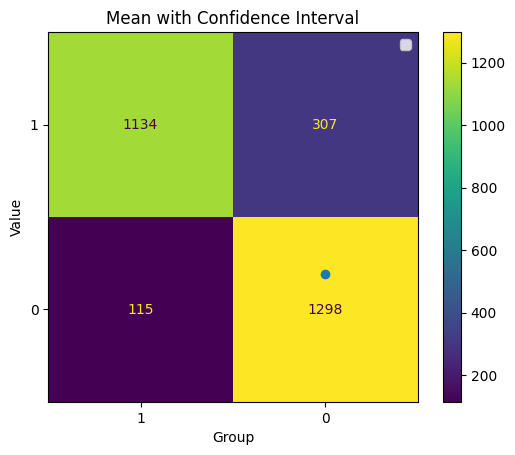


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1441
           1       0.71      0.55      0.62      1413

    accuracy                           0.67      2854
   macro avg       0.68      0.67      0.66      2854
weighted avg       0.68      0.67      0.66      2854



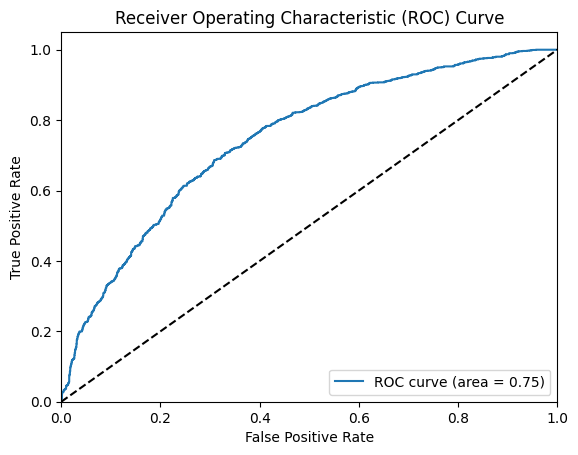

AUC Score: 0.7453629011464378


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6468531468531469, 0.6188811188811189, 0.6398601398601399, 0.7097902097902098, 0.6947368421052632, 0.7368421052631579, 0.6666666666666666, 0.6526315789473685, 0.6280701754385964, 0.631578947368421]
Mean accuracy: 0.6625910931174089
95% confidence interval: (0.6346621197125571, 0.6905200665222607)


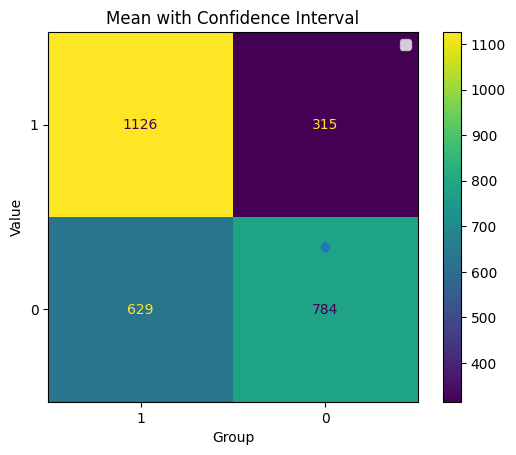

In [7]:

print('ADDING 30% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 30)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 30% of inaccuracies in bmi

ADDING 30% TO FEATURE: bmi
--------------------------------------
Modifying 2853 rows in column 'bmi'
Rows to modify: [2021, 5142, 1964, 5584, 245, 9085, 6753, 5964, 2075, 6256, 6094, 2151, 5741, 6800, 3902, 2522, 5793, 8922, 3078, 1345, 9214, 6978, 4466, 4589, 1514, 2368, 2672, 6924, 9192, 8116, 1217, 7339, 4790, 5241, 2797, 1434, 9142, 8534, 9269, 3851, 7934, 8976, 8306, 9139, 7198, 1005, 3650, 2191, 6051, 3210, 4873, 8529, 6783, 2393, 9031, 4608, 4736, 7866, 3226, 5387, 2279, 3263, 5488, 2235, 5551, 8241, 8668, 4155, 7529, 6552, 8271, 1853, 2981, 7876, 4960, 3981, 7967, 5329, 6523, 4708, 2416, 5501, 6667, 6842, 862, 6908, 8452, 6272, 7921, 6492, 3112, 385, 2657, 5187, 7221, 978, 7207, 6740, 1399, 8857, 688, 7305, 8980, 2509, 2491, 7817, 6215, 3009, 5726, 2392, 6654, 3808, 5153, 198, 1276, 8697, 1334, 783, 2323, 3212, 4782, 5611, 8212, 2955, 3002, 1923, 5959, 8992, 677, 6805, 8816, 4760, 9070, 9052, 7282, 7747, 8204, 4305, 1569, 9491, 2748, 1417, 9431, 7491, 4569, 5848, 8355, 7570, 6

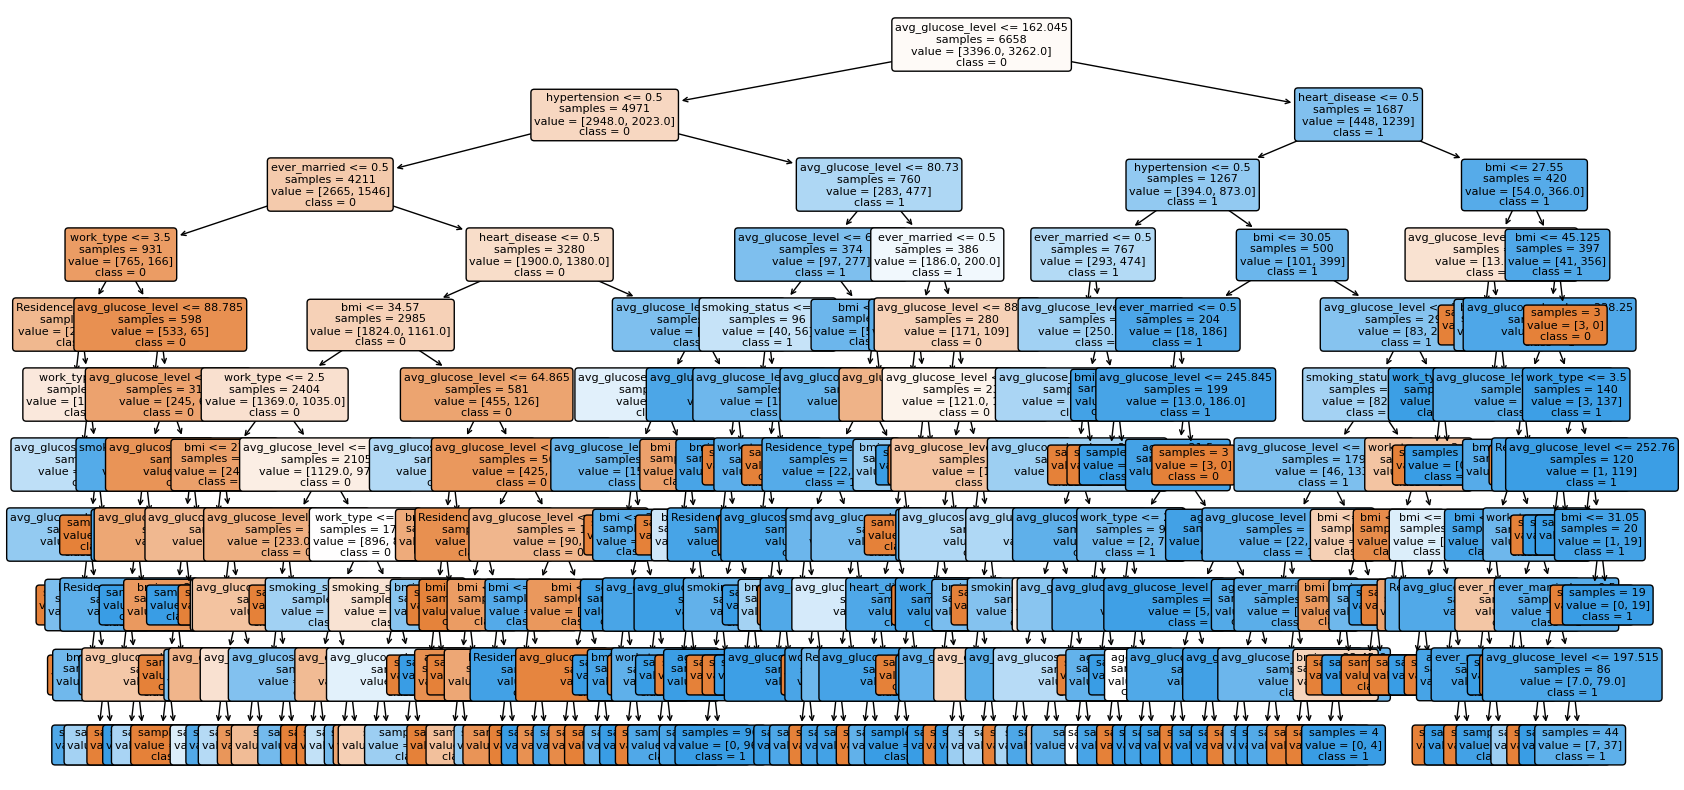

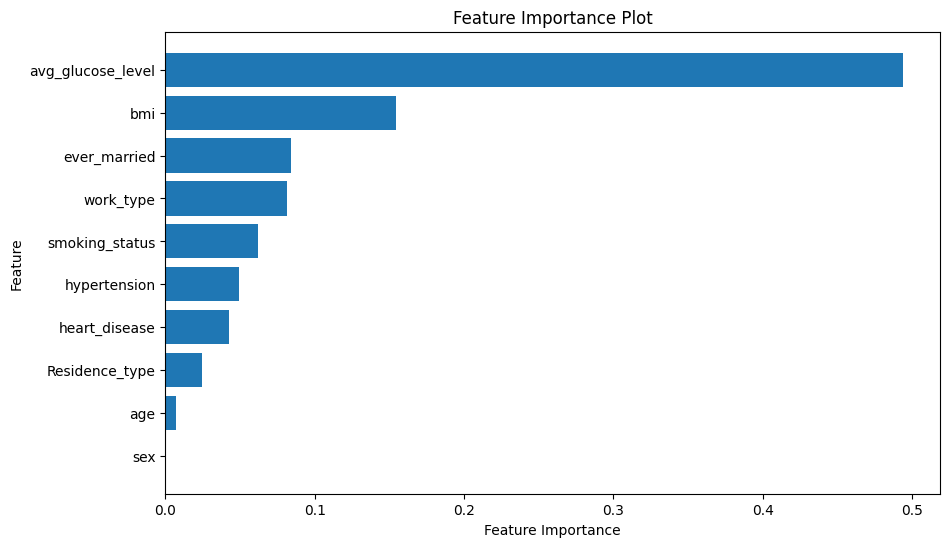

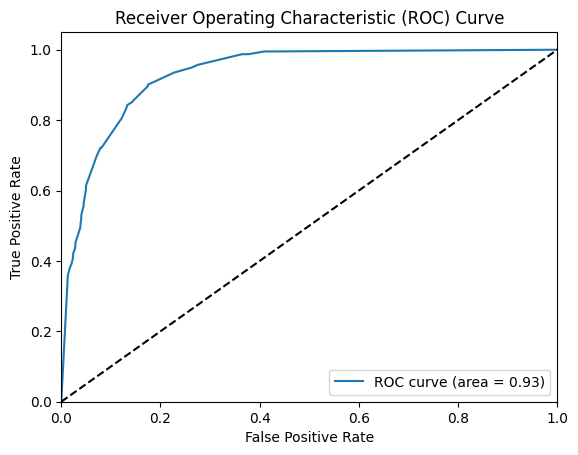

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9309585866935018
Accuracy for each fold: [0.8426573426573427, 0.8006993006993007, 0.7657342657342657, 0.8181818181818182, 0.7964912280701755, 0.8035087719298246, 0.8596491228070176, 0.8175438596491228, 0.8245614035087719, 0.8105263157894737]
Mean accuracy: 0.8139553429027113
95% confidence interval: (0.7955128882973783, 0.8323977975080443)


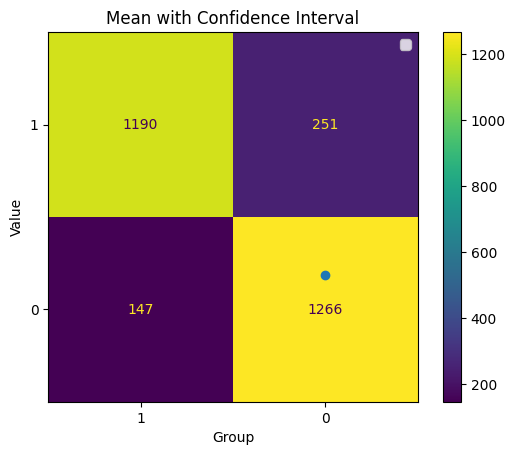


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



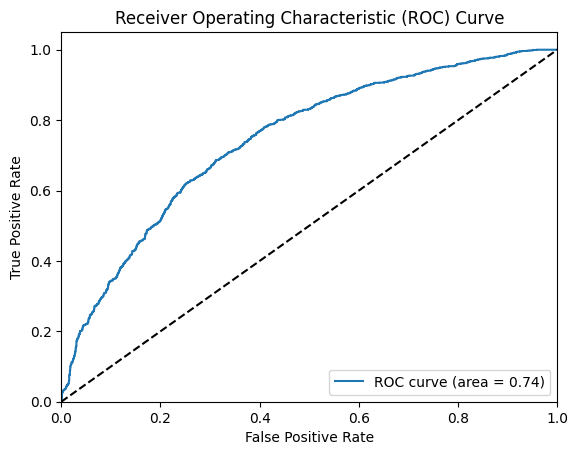

AUC Score: 0.7447597971252369


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6853146853146853, 0.6468531468531469, 0.6293706293706294, 0.6643356643356644, 0.6526315789473685, 0.6385964912280702, 0.6491228070175439, 0.6, 0.7052631578947368, 0.6771929824561403]
Mean accuracy: 0.6548681143417985
95% confidence interval: (0.6334308198954022, 0.6763054087881948)


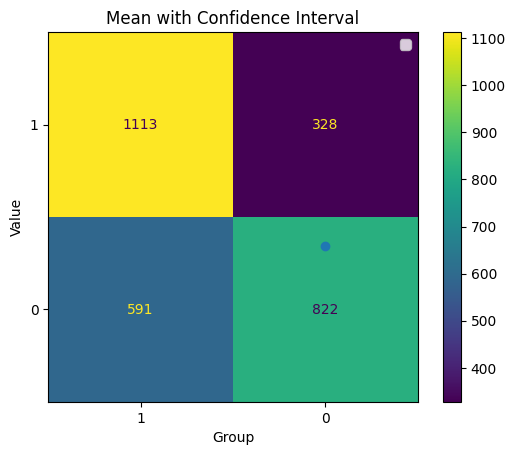

In [8]:
print('ADDING 30% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 30)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

inaccuracies on bmi and avg_glucose_level features

ADDING 30% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 2853 rows in column 'avg_glucose_level'
Rows to modify: [1497, 1448, 4224, 4120, 8562, 6175, 3556, 8258, 1826, 2197, 2200, 8756, 8308, 4052, 5220, 633, 8249, 3439, 1264, 4977, 1998, 5322, 6089, 378, 6381, 6509, 800, 6101, 9000, 1405, 4309, 4471, 2260, 1622, 8122, 6440, 7713, 7236, 163, 7046, 4222, 828, 3825, 2249, 605, 4946, 5829, 4834, 2332, 3661, 3409, 831, 7451, 7467, 5351, 3295, 1952, 2984, 8587, 9265, 9070, 5064, 490, 4979, 9367, 452, 7444, 146, 5847, 2131, 7553, 3663, 7477, 1513, 7577, 8456, 1595, 4734, 5127, 3501, 234, 4396, 6215, 1805, 7108, 3393, 5102, 4395, 2902, 3624, 2986, 2814, 6823, 8594, 9423, 7506, 4335, 7509, 607, 8737, 5973, 3447, 3219, 4704, 1804, 2037, 925, 2721, 423, 3011, 6131, 2530, 8662, 2617, 7131, 5656, 3462, 1820, 3630, 1531, 8907, 6507, 6561, 1031, 6027, 7736, 6393, 2009, 4728, 5389, 9066, 9169, 6155, 8604, 6735, 1511, 5578, 1422, 5821, 8848, 9343, 4412, 6150, 858

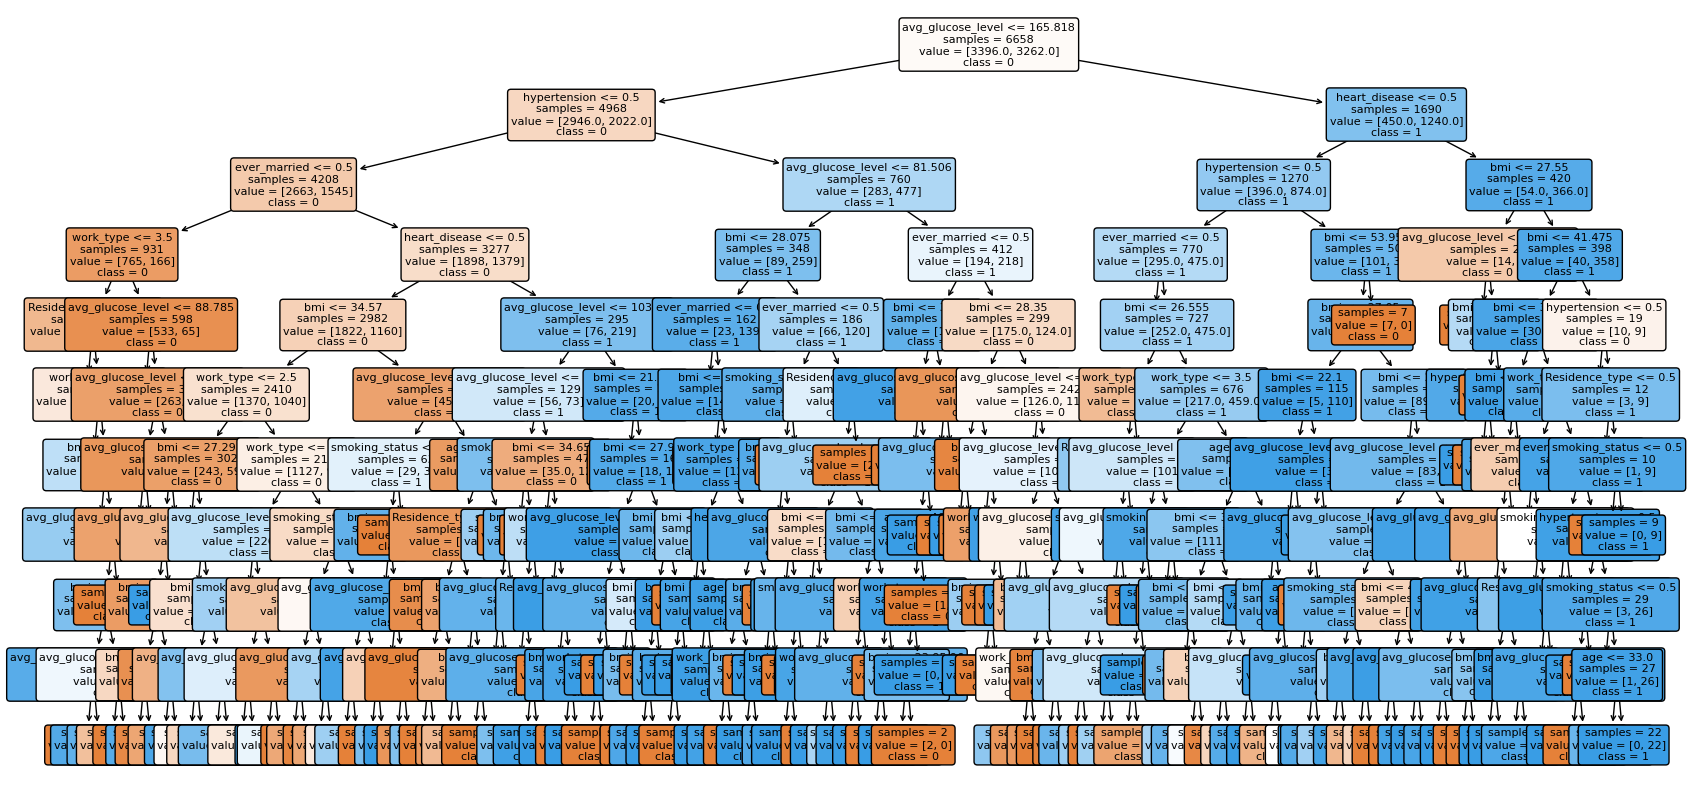

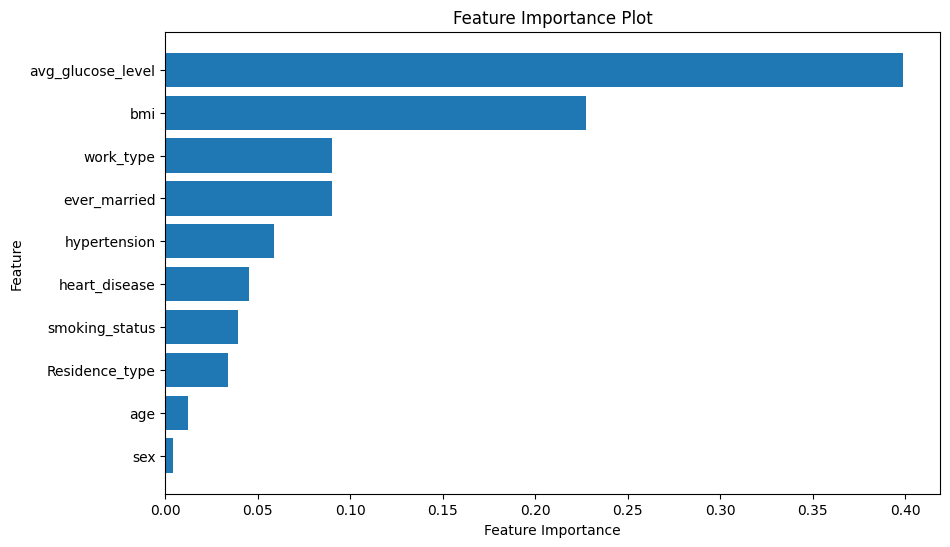

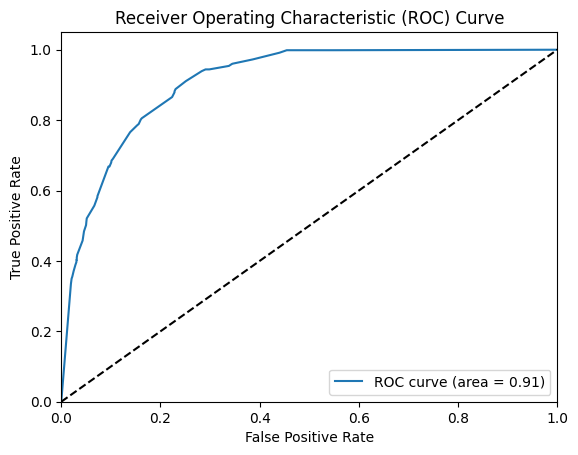

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9085283230515885
Accuracy for each fold: [0.7797202797202797, 0.8356643356643356, 0.8496503496503497, 0.7972027972027972, 0.8245614035087719, 0.8280701754385965, 0.8105263157894737, 0.8210526315789474, 0.8105263157894737, 0.8350877192982457]
Mean accuracy: 0.8192062323641272
95% confidence interval: (0.8045951852832932, 0.8338172794449611)


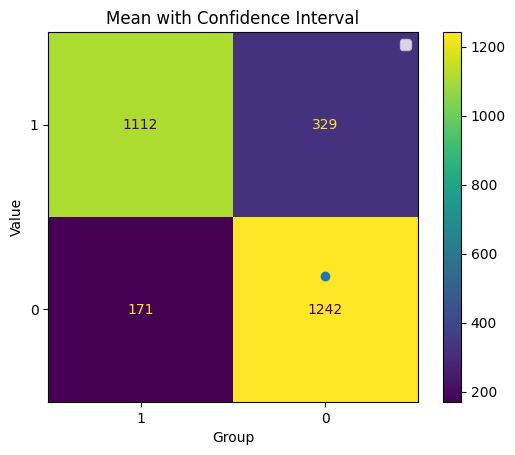


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1441
           1       0.71      0.56      0.63      1413

    accuracy                           0.67      2854
   macro avg       0.68      0.67      0.67      2854
weighted avg       0.68      0.67      0.67      2854



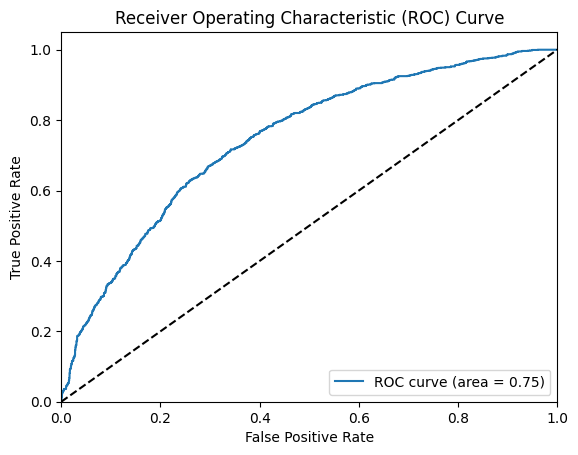

AUC Score: 0.7451266690338991


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6748251748251748, 0.6713286713286714, 0.6713286713286714, 0.6958041958041958, 0.7052631578947368, 0.631578947368421, 0.6842105263157895, 0.6070175438596491, 0.6385964912280702, 0.6140350877192983]
Mean accuracy: 0.6593988467672678
95% confidence interval: (0.6348770987504653, 0.6839205947840703)


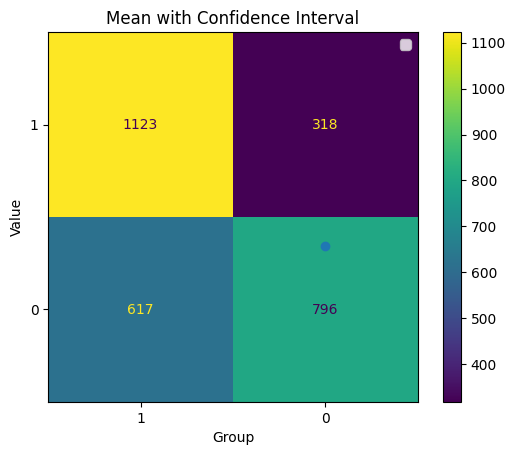

In [9]:
print('ADDING 30% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 30)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 30)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 30% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 2853 rows in column 'avg_glucose_level'
Rows to modify: [1789, 2440, 8655, 9113, 7275, 693, 7395, 8794, 6411, 5495, 1818, 1925, 3079, 635, 6925, 1094, 8379, 618, 6239, 948, 8482, 5071, 1101, 601, 5036, 7901, 2872, 7500, 8210, 4910, 6772, 5012, 7031, 5649, 5486, 6715, 4230, 2171, 3518, 4907, 2690, 8140, 5513, 7248, 677, 2120, 8560, 471, 8219, 2735, 5001, 2691, 5424, 5343, 2525, 3025, 6836, 529, 1188, 6915, 5641, 7223, 2732, 5302, 9097, 3275, 795, 3988, 7685, 5699, 1243, 4582, 5277, 7052, 4160, 268, 125, 767, 8209, 7199, 8413, 2008, 7677, 5016, 798, 1803, 9263, 2323, 638, 8401, 3931, 2981, 8430, 4687, 1601, 2034, 4565, 3301, 513, 2283, 7532, 3579, 4067, 4021, 6356, 5865, 9130, 653, 6455, 2736, 8844, 4902, 6151, 8779, 6993, 4543, 225, 3054, 3255, 7158, 3602, 4647, 7687, 5730, 2274, 1960, 1136, 6718, 6206, 1655, 2148, 8497, 3539, 7753, 2616, 8675, 5385, 8367, 5348, 690, 2646, 4766, 5497, 3928, 2273, 6171, 48

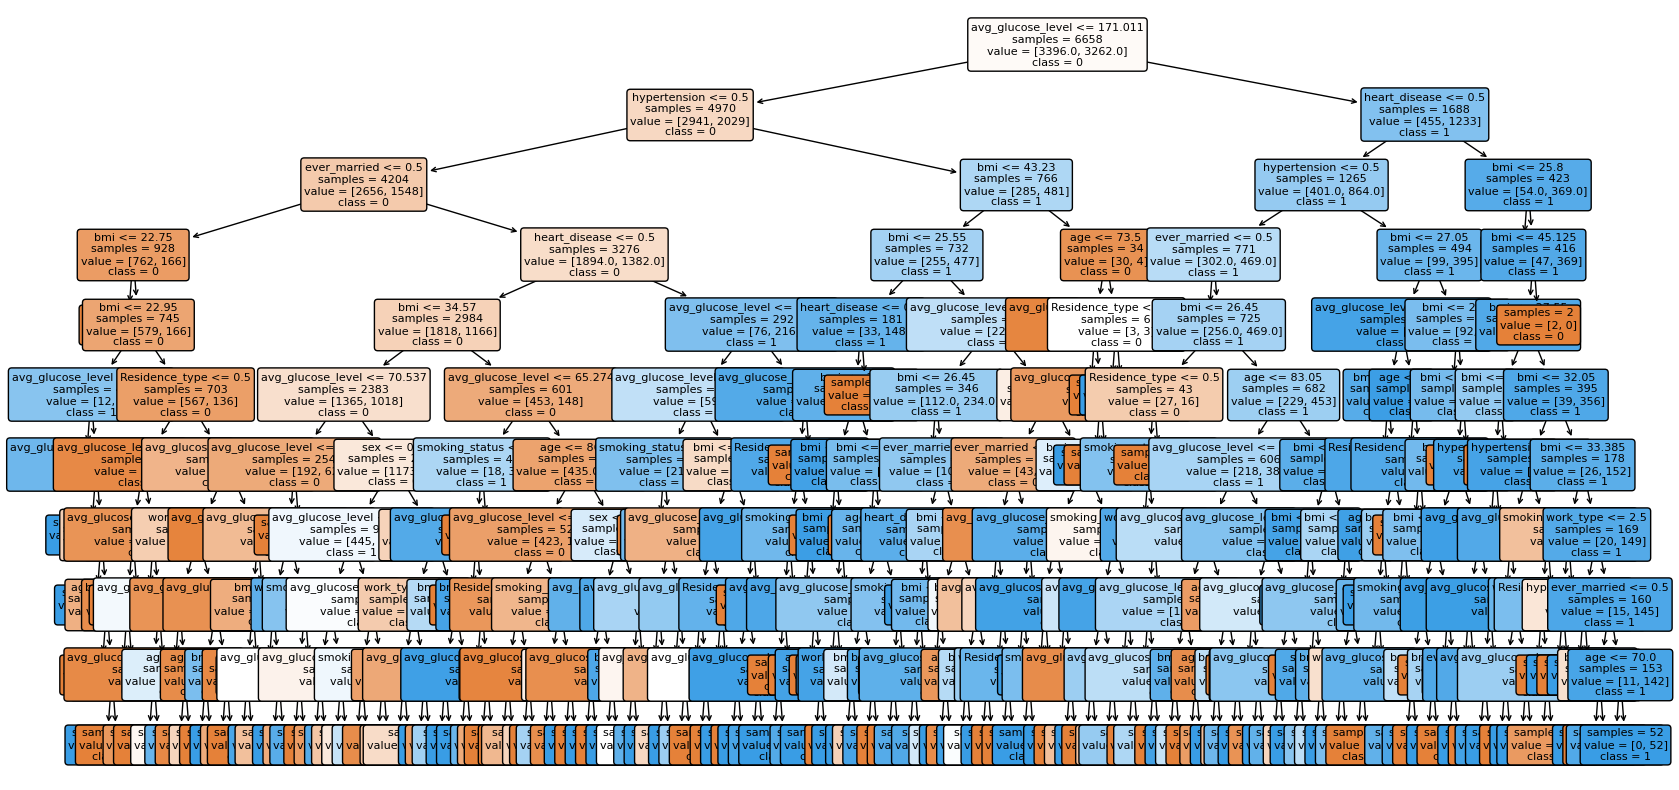

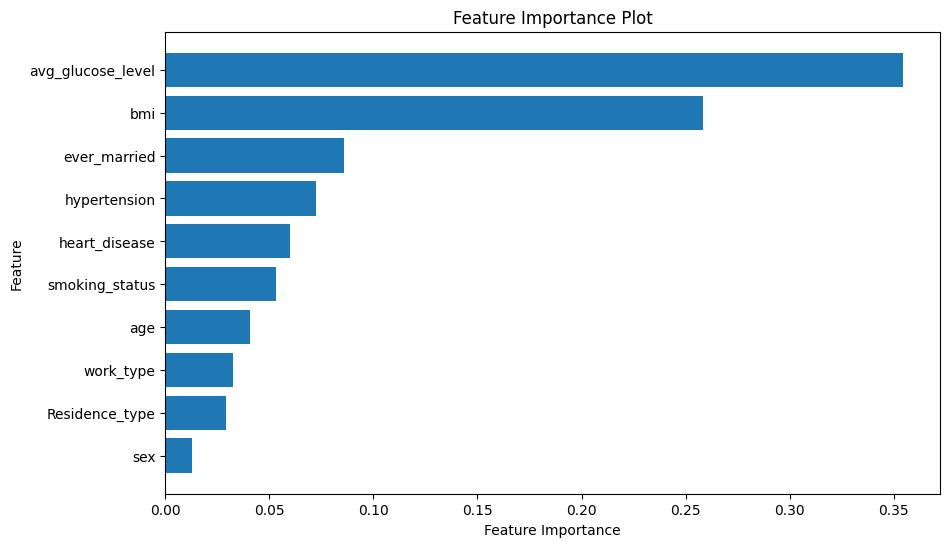

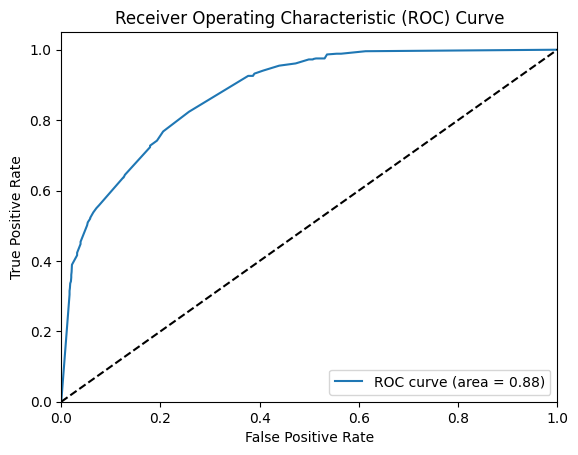

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8767754856878209
Accuracy for each fold: [0.8111888111888111, 0.8111888111888111, 0.8146853146853147, 0.7832167832167832, 0.8105263157894737, 0.7894736842105263, 0.7859649122807018, 0.8035087719298246, 0.8491228070175438, 0.8491228070175438]
Mean accuracy: 0.8107999018525334
95% confidence interval: (0.7942135992384145, 0.8273862044666522)


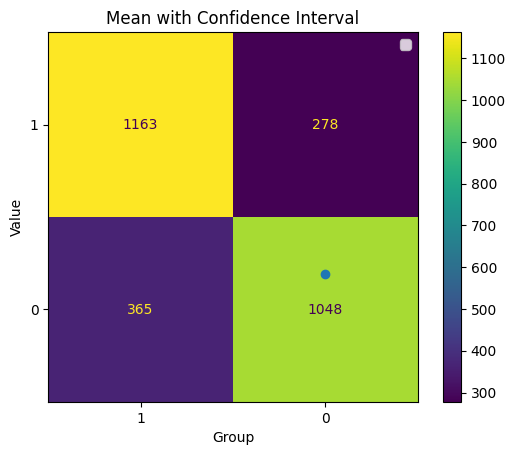


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



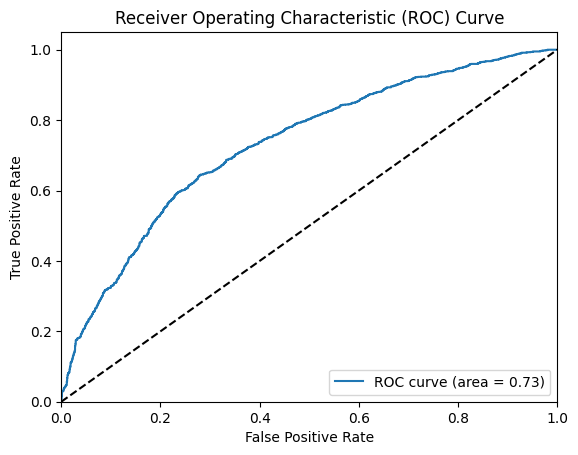

AUC Score: 0.730783303448252


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6328671328671329, 0.6678321678321678, 0.6153846153846154, 0.6818181818181818, 0.6491228070175439, 0.6771929824561403, 0.6385964912280702, 0.6631578947368421, 0.6701754385964912, 0.6701754385964912]
Mean accuracy: 0.6566323150533677
95% confidence interval: (0.6411058628172837, 0.6721587672894518)


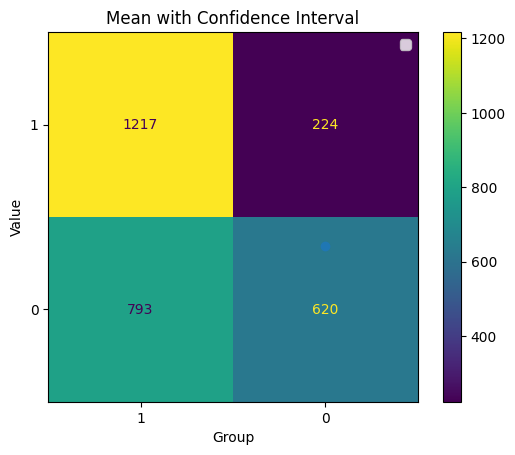

In [10]:
print('ADDING 30% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 30)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 30)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 